In [1]:
#%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import matplotlib.pyplot as plt
import numpy as np
import cotengra as ctg


c:\Users\LauraMismetti\IBM\hubbard_qcnn\.venv\Lib\site-packages\cotengra\hyperoptimizers\hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


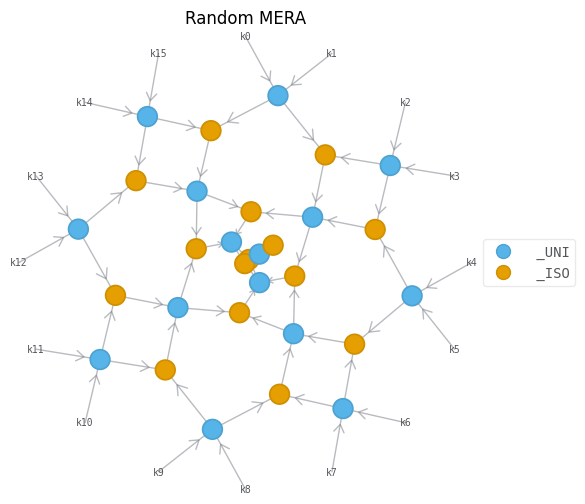

In [3]:
# Simple example
n = 16
mera = qtn.MERA.rand_invar(n)

# plot settings
from math import cos, sin, pi
fix = {
    f'k{i}': (sin(2 * pi * i / n), cos(2 * pi * i / n))
    for i in range(n)
}
# reduce the 'spring constant' k as well
draw_opts = dict(fix=fix, k=0.05, title='Random MERA')
mera.draw(color=['_UNI', '_ISO'], show_inds=True, show_tags=False, **draw_opts)

In [9]:
print(mera)
print(mera.tensors[0].data)
print('---')
print(mera.tensors[2].data)

MERA([
    IsoTensor(shape=(2, 2, 2, 2), inds=('k0', 'k1', '_11fbd2AAAAQ_0', '_11fbd2AAAAQ_1'), tags=oset(['_UNI', '_LAYER0', 'I0', 'I1']), left_inds=('k0', 'k1')),
    IsoTensor(shape=(2, 2, 2), inds=('_11fbd2AAAAQ_1', '_11fbd2AAAAQ_2', '_11fbd2AAAAR_0'), tags=oset(['_ISO', '_LAYER0', 'I0', 'I1', 'I2', 'I3']), left_inds=('_11fbd2AAAAQ_1', '_11fbd2AAAAQ_2')),
    IsoTensor(shape=(2, 2, 2, 2), inds=('k2', 'k3', '_11fbd2AAAAQ_2', '_11fbd2AAAAQ_3'), tags=oset(['_UNI', '_LAYER0', 'I2', 'I3']), left_inds=('k2', 'k3')),
    IsoTensor(shape=(2, 2, 2), inds=('_11fbd2AAAAQ_3', '_11fbd2AAAAQ_4', '_11fbd2AAAAR_1'), tags=oset(['_ISO', '_LAYER0', 'I2', 'I3', 'I4', 'I5']), left_inds=('_11fbd2AAAAQ_3', '_11fbd2AAAAQ_4')),
    IsoTensor(shape=(2, 2, 2, 2), inds=('k4', 'k5', '_11fbd2AAAAQ_4', '_11fbd2AAAAQ_5'), tags=oset(['_UNI', '_LAYER0', 'I4', 'I5']), left_inds=('k4', 'k5')),
    IsoTensor(shape=(2, 2, 2), inds=('_11fbd2AAAAQ_5', '_11fbd2AAAAQ_6', '_11fbd2AAAAR_2'), tags=oset(['_ISO', '_LAYER0', 'I4

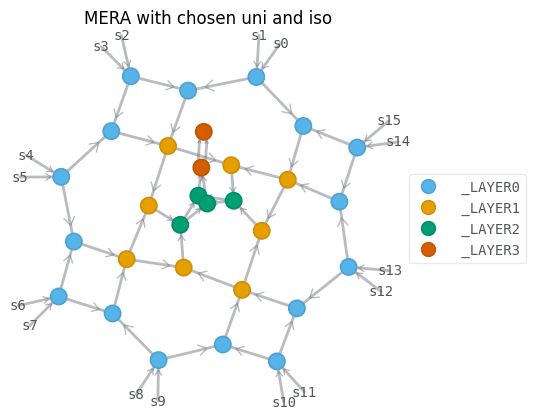

MERA(tensors=30, indices=60, L=16, max_bond=2)

In [3]:
# ARBITRARILY CHOSEN INITIAL UNITARIES
n = 16 # meaning 1x8
phys_dim = 2

# definition unitaries and isometries - they are both  15
# D = phys_dim # physical dimension
# uni = qu.rand_iso(D**2, D**2)
# uni.shape = (D, D, D, D)

# Dl = phys_dim
# Du = min(Dl**2, 8)
# iso = qu.rand_iso(Dl**2, Du)
# iso.shape = (Dl, Dl, Du)

uni = [i*np.asarray([[[[1., 1.], [1., 1.]],[[1., 1.], [1., 1.]]],[[[1., 1.], [1., 1.]],[[1., 1.], [1., 1.]]]]) for i in np.arange(15)]
iso = [(i+0.5)*np.asarray([[[1., 1.], [1., 1.]],[[1., 1.], [1., 1.]]]) for i in np.arange(15)]

# definition of the MERA
tn_opts = dict() 
mera = qtn.MERA(n, uni=uni, iso=iso, phys_dim=phys_dim, dangle=False, site_ind_id="s{}", site_tag_id="I{}", **tn_opts)

draw_opts = dict(title='MERA with chosen uni and iso', edge_scale=2, figsize=(5,5), font_size_inner=10, k=0.5)
mera.draw(color=[f'_LAYER{i}' for i in range(4)], show_inds=True, **draw_opts) # ['_UNI', '_ISO']+

# this is the function that projects all tensors with ``left_inds`` into unitary / isometric form
mera.isometrize_()


In [42]:
print(mera.tensors[1].data)

[[[ 0.5        -0.8660254 ]
  [ 0.5         0.28867513]]

 [[ 0.5         0.28867513]
  [ 0.5         0.28867513]]]


terms =  {(0, 1): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (1, 2): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (2, 3): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (3, 4): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (4, 5): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (5, 6): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (6, 7): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (7, 8): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (8, 9): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (9, 10): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (10, 11): [[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]], (11, 12): [[ 0.  0.  0.  0.]
 [ 0. -1.  1

log2[SIZE]: 7.00 log10[FLOPs]: 3.66: 100%|██████████| 16/16 [00:00<00:00, 26.60it/s]
-10.543423103045 [best: -10.543423103045] : : 2it [00:07,  3.60s/it]                   
-19.607483280950 [best: -19.607483280950] :  37%|███▋      | 369/999 [00:22<00:37, 16.70it/s]
-19.607690858753 [best: -19.607690858753] : : 1001it [01:00, 16.57it/s]                        


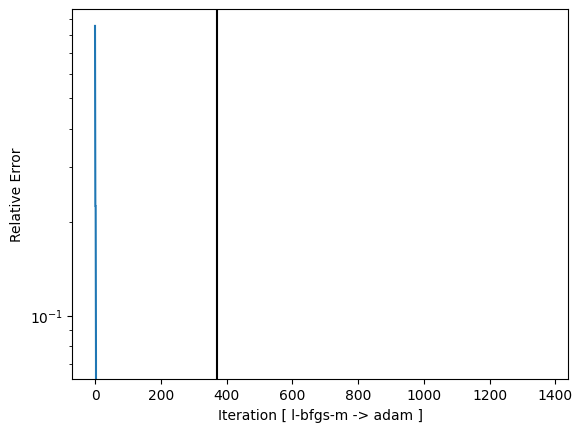

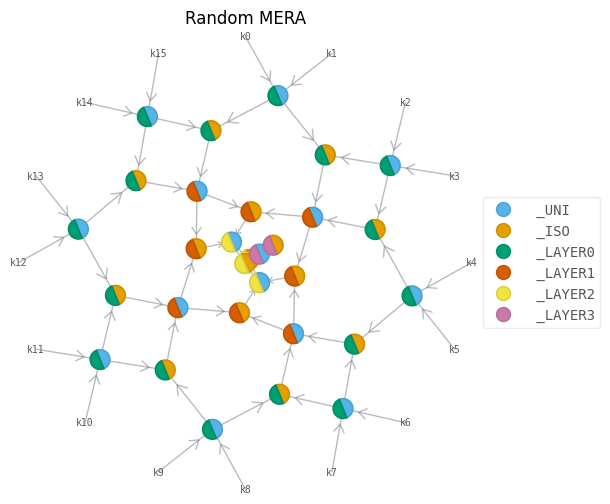

In [50]:
# HUBBARD HAMILTONIAN
# -- cannot use a list of terms bc there are the NN interactions...
H_hub_2sites = qu.ham_hubbard_hardcore(n=2, t=1., V=4.).real
terms = {(i, (i + 1) % n): H_hub_2sites for i in range(n)}
print('terms = ', terms)

en = qu.groundenergy(qu.ham_hubbard_hardcore(n, t=1., V=4., cyclic=True, sparse=True))
print('ground energy = ', en)
print(qu.ham_hubbard_hardcore(8, t=1., V=4., cyclic=True, sparse=True))

def norm_fn(mera):
    # there are a few methods to do the projection
    # exp works well for optimization
    return mera.isometrize(method='exp')

def local_expectation(mera, terms, where, optimize='auto-hq'):
    """Compute the energy for a single local term.
    """
    # get the lightcone for `where`
    tags = [mera.site_tag(coo) for coo in where]
    mera_ij = mera.select(tags, 'any')
    
    # apply the local gate
    G = terms[where]
    mera_ij_G = mera_ij.gate(terms[where], where)
    
    # compute the overlap - this is where the real computation happens
    mera_ij_ex = (mera_ij_G & mera_ij.H)
    return mera_ij_ex.contract(all, optimize=optimize)

def loss_fn(mera, terms, **kwargs):
    """Compute the total energy as a sum of all terms.
    """
    return sum(
        local_expectation(mera, terms, where, **kwargs)
        for where in terms
    )

# To find a high quality contraction path for each term 
opt = ctg.ReusableHyperOptimizer(
    progbar=True,
    reconf_opts={},
    max_repeats=16,
    # directory=  # set this for persistent cache
)
# first call, compiling stuff
loss_fn(norm_fn(mera), terms, optimize=opt)
# a second call should be much faster
loss_fn(norm_fn(mera), terms, optimize=opt)

#################
# set-up the MERA optimizer object:
tnopt = qtn.TNOptimizer(
    mera,
    loss_fn=loss_fn, 
    norm_fn=norm_fn,
    loss_constants={'terms': terms},
    loss_kwargs={'optimize': opt},
    autodiff_backend='torch', device='cpu', jit_fn=True, 
)

# the first step involves compiling the computation, which might take some time and print some (ignorable) warnings:
tnopt.optimize(1)

tnopt.optimizer = 'l-bfgs-b'  # the default
mera_opt_hubbard = tnopt.optimize(999)

tnopt.optimizer = 'adam'  # useful for final iterations
mera_opt_hubbard = tnopt.optimize(1000)

rel_err = (np.array(tnopt.losses) - en) / abs(en)

plt.plot(rel_err)
plt.xlabel('Iteration [ l-bfgs-m -> adam ]')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.axvline(len(tnopt.losses) - 1000, color='black')
plt.savefig('error_vs_it-hubbard.png')
plt.show()

mera_opt_hubbard.draw(color=['_UNI', '_ISO']+[f'_LAYER{i}' for i in range(4)], show_inds=True, **draw_opts)


In [47]:
print(H_hub_2sites)

[[ 0.  0.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  0.  2.]]


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\LauraMismetti\IBM\hubbard_qcnn\.venv\Lib\site-packages\quimb\utils.py:170: Warning: The unitize function is deprecated in favor of isometrize
  warnings.warn(
-3.045947313309 [best: -3.045947313309] : : 3it [01:26, 28.78s/it]                     
c:\Users\LauraMismetti\IBM\hubbard_qcnn\.venv\Lib\site-packages\quimb\utils.py:170: Warning: The unitize function is deprecated in favor of isometrize
  warnings.warn(
-28.148635864258 [best: -28.148635864258] :  75%|███████▌  | 752/999 [36:28<11:58,  2.91s/it]   
-28.254051208496 [best: -28.254051208496] : : 1001it [46:29,  2.79s/it]                         


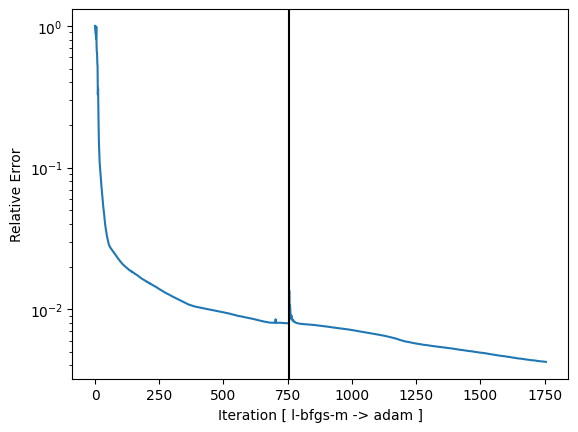

In [5]:
# # total length (currently must be power of 2)
# L = 2**4

# # max bond dimension
# D = 8

# # use single precision for quick GPU optimization
# dtype = 'float32'

# mera = qtn.MERA.rand(L, max_bond=D, dtype=dtype)

# # this is the function that projects all tensors 
# # with ``left_inds`` into unitary / isometric form
# mera.isometrize_()

# # Hamiltionian
# H2 = qu.ham_heis(2).real.astype(dtype)
# terms = {(i, (i + 1) % L): H2 for i in range(L)}

# if L <= 20:
#     # numerical result
#     en = qu.groundenergy(qu.ham_heis(L, cyclic=True, sparse=True))
# else:
#     # analytic result for long (PBC) chains
#     en = qu.heisenberg_energy(L)
    
# en

# def norm_fn(mera):
#     # there are a few methods to do the projection
#     # exp works well for optimization
#     return mera.unitize(method='exp')

# def local_expectation(mera, terms, where, optimize='auto-hq'):
#     """Compute the energy for a single local term.
#     """
#     # get the lightcone for `where`
#     tags = [mera.site_tag(coo) for coo in where]
#     mera_ij = mera.select(tags, 'any')
    
#     # apply the local gate
#     G = terms[where]
#     mera_ij_G = mera_ij.gate(terms[where], where)
    
#     # compute the overlap - this is where the real computation happens
#     mera_ij_ex = (mera_ij_G & mera_ij.H)
#     return mera_ij_ex.contract(all, optimize=optimize)


# def loss_fn(mera, terms, **kwargs):
#     """Compute the total energy as a sum of all terms.
#     """
#     return sum(
#         local_expectation(mera, terms, where, **kwargs)
#         for where in terms
#     )

# import cotengra as ctg

# opt = ctg.ReusableHyperOptimizer(
#     progbar=True,
#     reconf_opts={},
#     max_repeats=16,
#     # directory=  # set this for persistent cache
# )

# loss_fn(norm_fn(mera), terms, optimize=opt)

# # a second call should be much faster
# loss_fn(norm_fn(mera), terms, optimize=opt)

# tnopt = qtn.TNOptimizer(
#     mera,
#     loss_fn=loss_fn, 
#     norm_fn=norm_fn,
#     loss_constants={'terms': terms},
#     loss_kwargs={'optimize': opt},
#     autodiff_backend='torch', device='cpu', jit_fn=True, 
# )

# tnopt.optimize(1)

# tnopt.optimizer = 'l-bfgs-b'  # the default
# mera_opt = tnopt.optimize(999)

# tnopt.optimizer = 'adam'  # useful for final iterations
# mera_opt = tnopt.optimize(1000)

# import matplotlib.pyplot as plt
# import numpy as np

# rel_err = (np.array(tnopt.losses) - en) / abs(en)

# plt.plot(rel_err)
# plt.xlabel('Iteration [ l-bfgs-m -> adam ]')
# plt.ylabel('Relative Error')
# plt.yscale('log')
# plt.axvline(len(tnopt.losses) - 1000, color='black')
# plt.savefig('error_vs_it.png')

MERA([
    IsoTensor(shape=(2, 2, 2, 2), inds=('k0', 'k1', '_b7102eAADRw_0', '_b7102eAADRw_1'), tags=oset(['_UNI', '_LAYER0', 'I0', 'I1']), left_inds=('k0', 'k1')),
    IsoTensor(shape=(2, 2, 4), inds=('_b7102eAADRw_1', '_b7102eAADRw_2', '_b7102eAADRx_0'), tags=oset(['_ISO', '_LAYER0', 'I0', 'I1', 'I2', 'I3']), left_inds=('_b7102eAADRw_1', '_b7102eAADRw_2')),
    IsoTensor(shape=(2, 2, 2, 2), inds=('k2', 'k3', '_b7102eAADRw_2', '_b7102eAADRw_3'), tags=oset(['_UNI', '_LAYER0', 'I2', 'I3']), left_inds=('k2', 'k3')),
    IsoTensor(shape=(2, 2, 4), inds=('_b7102eAADRw_3', '_b7102eAADRw_4', '_b7102eAADRx_1'), tags=oset(['_ISO', '_LAYER0', 'I2', 'I3', 'I4', 'I5']), left_inds=('_b7102eAADRw_3', '_b7102eAADRw_4')),
    IsoTensor(shape=(2, 2, 2, 2), inds=('k4', 'k5', '_b7102eAADRw_4', '_b7102eAADRw_5'), tags=oset(['_UNI', '_LAYER0', 'I4', 'I5']), left_inds=('k4', 'k5')),
    IsoTensor(shape=(2, 2, 4), inds=('_b7102eAADRw_5', '_b7102eAADRw_6', '_b7102eAADRx_2'), tags=oset(['_ISO', '_LAYER0', 'I4

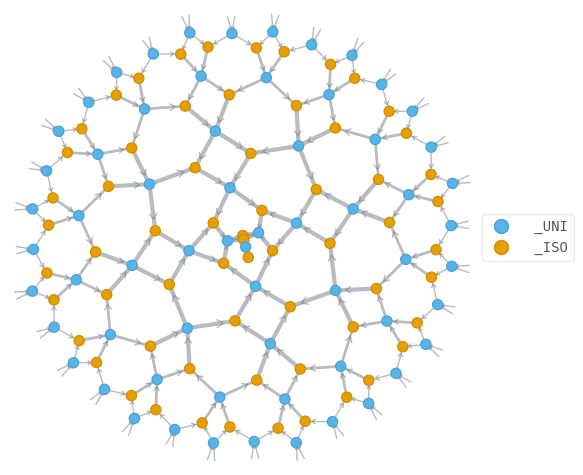

In [13]:
# print(mera_opt)
# mera_opt.draw(color=['_UNI', '_ISO'])